**MIMO, SIMO, SISO, AWGN capcity vs SNR comparison**

*Capacity vs SNR curves of SIMO, SISO, AWGN channels.
4X4 MIMO system capacity is found by allocating equal power, optimal power using water filling algorithm and plotted the capacity for optimal power allocation, equal power vs SNR using Python*

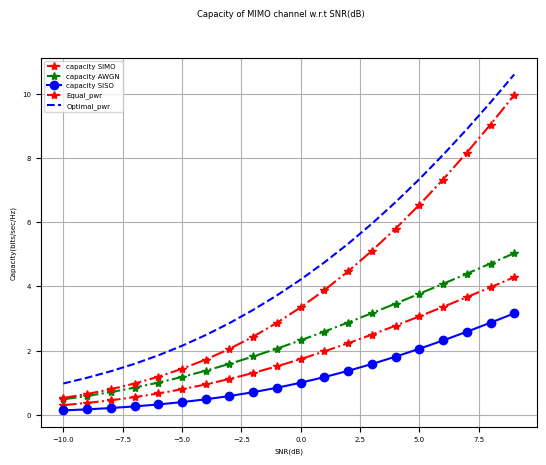

In [7]:
import numpy as np
import numpy.linalg as nl
import numpy.random as nr
import matplotlib.pyplot as plt




#Function for Equal power allocation to all channels
def cap_eq_pwr(H, SNR):
    U,S,V = nl.svd(H, full_matrices= False);
    Nt = len(S);
    cap = sum(np.log2(1+S[0:Nt]**2*SNR/Nt));
    return cap

#Function for optimal power allocation
def cap_opt_pwr(H, SNR):
    U,S,V = nl.svd(H, full_matrices= False);
    Nt = len(S);
    cap = 0;
    while not cap:
        one_by_lam = (SNR + sum(1/S[0:Nt]**2))/Nt
        Pn = one_by_lam - (1/S[Nt-1]**2)
        if Pn >= 0:
            opt_P = one_by_lam - 1/S[0:Nt]**2;
            cap = sum(np.log2(1+ S[0:Nt]**2*opt_P));
        elif Pn < 0:
            Nt = Nt-1;
    return cap
#varying SNR from -10dB TO 10dB
SNRdB = np.arange(-10,10,1);
SNR = 10**(SNRdB/10);
Nr= 4;Nt= 4;n_blocks = 10000;#Considering 4X4 MIMO channel matrix
capacity_Eq_pwr = np.zeros(len(SNRdB));
capacity_opt_pwr = np.zeros(len(SNRdB));

for n in range(n_blocks):
    #H = channel coefficient matrix (4X4)
    H = (nr.normal(0,1,(Nr,Nt))+1j*nr.normal(0,1,(Nr,Nt)))/np.sqrt(2)
    for kx in range(len(SNRdB)):
        capacity_Eq_pwr[kx] = capacity_Eq_pwr[kx]+ cap_eq_pwr(H, SNR[kx])
        capacity_opt_pwr[kx] = capacity_opt_pwr[kx]+ cap_opt_pwr(H, SNR[kx])

capacity_Eq_pwr = capacity_Eq_pwr/n_blocks;
capacity_opt_pwr = capacity_opt_pwr/n_blocks;

# Declaring random channel coefficient
h = (nr.normal(0,1,(Nr,1))+1j*nr.normal(0,1,(Nr,1)))/np.sqrt(2)

# Initialize arrays
SNRlin = np.zeros(len(SNRdB))
capacity_simo = np.zeros(len(SNRdB))
capacityawgn = np.zeros(len(SNRdB))
capacity_siso = np.zeros(len(SNRdB))

# Defining norm of random channel coefficient
m = np.linalg.norm(h)

# Calculate capacity for each SNR value
for i in range(len(SNRdB)):
    SNRlin[i] = 10 ** (SNRdB[i] / 10)  # Conversion of SNR from dB
    capacity_simo[i] = np.log2(1 + (m**2 * SNRlin[i]))  # Capacity of SIMO wireless channel
    capacityawgn[i] = np.log2(1 + 4 * SNRlin[i])  # Capacity of SIMO AWGN channel
    capacity_siso[i] = np.log2(1 + SNRlin[i])  # Capacity of SISO wireless channel


#plotting the results
plt.rc('font', size=5)
plt.plot(SNRdB, capacity_simo, 'r-.*', label='capacity SIMO')
plt.plot(SNRdB, capacityawgn, 'g-.*', label='capacity AWGN')
plt.plot(SNRdB, capacity_siso, 'b-o', label='capacity SISO')
plt.plot(SNRdB , capacity_Eq_pwr ,'r-.*', label = 'Equal_pwr')
plt.plot(SNRdB , capacity_opt_pwr ,'b--', label = 'Optimal_pwr')
plt.grid()
plt.xlabel('SNR(dB)')
plt.ylabel('Capacity(bits/sec/Hz)')
plt.suptitle('Capacity of MIMO channel w.r.t SNR(dB)')
plt.legend()
plt.show()


*Observation:A 4x4 MIMO system is implemented and it is observed that the optimal power allocation obtained from the Water Filling Algorithm leads to a higher capacity than equal power allocation at all SNR levels.
The channel capacity of AWGN > capacity of SIMO > capacity of SISO and the capacity increases with increase in SNR in all the cases. So, as number of antennas increases the capacity increases and the AWGN channel has highest SNR*